In [23]:
!zipline bundles

csvdir <no ingestions>
quandl 2022-10-28 07:44:20.264583
quandl 2022-10-28 07:39:17.956289
quantopian-quandl <no ingestions>


In [21]:
import pandas as pd
import os

from zipline.data.bundles import register
from zipline.data.bundles.csvdir import csvdir_equities

os.environ['QUANDL_API_KEY'] = 'BudS34omGZzT4zsWJc-7'

In [22]:
!zipline ingest -b quandl

Merging daily equity files:


[2022-10-28 07:44:20.833607] INFO: zipline.data.bundles.core: Ingesting quandl.
[2022-10-28 07:44:20.833607] INFO: zipline.data.bundles.quandl: Downloading WIKI metadata.
[2022-10-28 07:44:36.231891] INFO: zipline.data.bundles.quandl: Parsing raw data.
[2022-10-28 07:45:06.138188] INFO: zipline.data.bundles.quandl: Generating asset metadata.
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\zipline\data\bcolz_daily_bars.py:366: UserWarning: Ignoring 1 values because they are out of bounds for uint32:             open  high   low  close        volume  ex_dividend  split_ratio
2011-04-11  1.79  1.84  1.55    1.7  6.674913e+09          0.0          1.0
  winsorise_uint32(raw_data, invalid_data_behavior, "volume", *OHLC)
[2022-10-28 07:47:11.118154] INFO: zipline.data.bundles.quandl: Parsing split data.
[2022-10-28 07:47:11.273124] INFO: zipline.data.bundles.quandl: Parsing dividend data.
[2022-10-28 07:47:13.509151] WARNING: zipline.data.adjustments: Couldn't compute ratio for div

In [ ]:
%load_ext zipline

C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:706: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:706: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:706: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:797: RuntimeWarning: invalid value encountered in

C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:706: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:706: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\s

C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:706: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:706: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:706: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\Dj\miniconda3\envs\liveproject\lib\site-packages\empyrical\stats.py:797: RuntimeWarning: invalid value encountered in

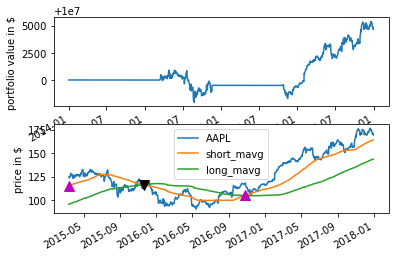

In [19]:

%zipline --start 2014-1-1 --end 2018-1-1 -o dma.pickle --no-benchmark


from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.loc[[t != [] for t in perf.transactions]]
    buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.loc[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.loc[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.loc[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()
